In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'],index_col='Month')

In [3]:
passengers_data = data[['#Passengers']]
print("Shape of the dataset:", passengers_data.shape)
print("First 10 rows of the dataset:")
print(passengers_data.head(10))

Shape of the dataset: (144, 1)
First 10 rows of the dataset:
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
1949-06-01          135
1949-07-01          148
1949-08-01          148
1949-09-01          136
1949-10-01          119


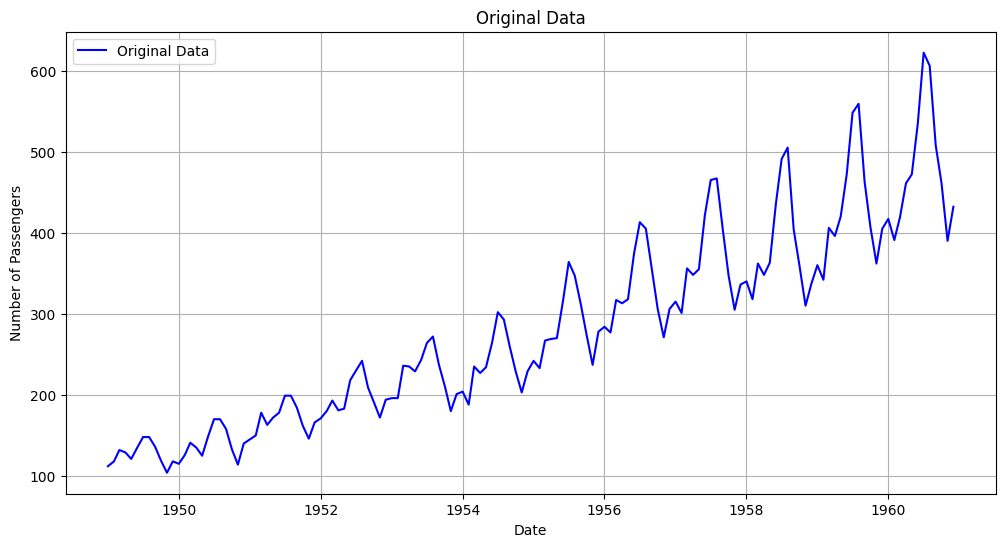

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(passengers_data['#Passengers'], label='Original Data', color='blue')
plt.title('Original Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid()
plt.show()

In [5]:
rolling_mean_5 = passengers_data['#Passengers'].rolling(window=5).mean()
rolling_mean_10 = passengers_data['#Passengers'].rolling(window=10).mean()

In [12]:
rolling_mean_5.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,122.4
1949-06-01,127.0
1949-07-01,133.0
1949-08-01,136.2
1949-09-01,137.6


In [13]:
rolling_mean_10.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


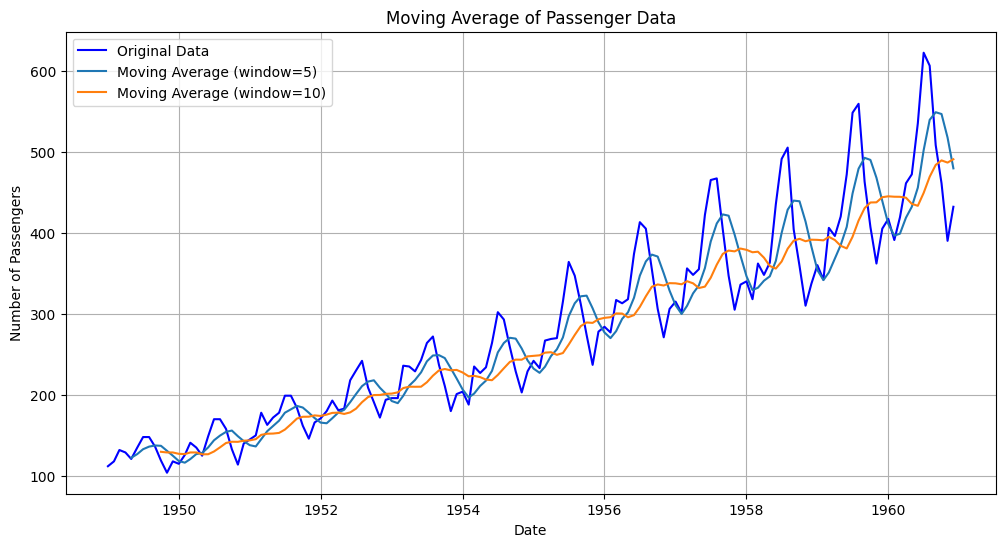

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(passengers_data['#Passengers'], label='Original Data', color='blue')
plt.plot(rolling_mean_5, label='Moving Average (window=5)')
plt.plot(rolling_mean_10, label='Moving Average (window=10)')
plt.title('Moving Average of Passenger Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid()
plt.show()

In [7]:
data_monthly = data.resample('MS').sum()   #Month start

In [8]:
scaler = MinMaxScaler()
scaled_data = pd.Series(scaler.fit_transform(data_monthly.values.reshape(-1, 1)).flatten(),index=data.index)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0.23159520645355827, 1.3403448090948091)

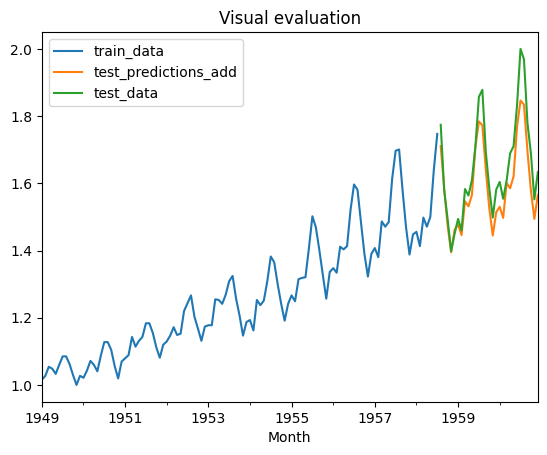

In [9]:
# The data seems to have additive trend and multiplicative seasonality
scaled_data=scaled_data+1 # multiplicative seasonality cant handle non postive values, yes even zeros
x=int(len(scaled_data)*0.8)
train_data = scaled_data[:x]
test_data = scaled_data[x:]

model_add = ExponentialSmoothing(train_data, trend='add', seasonal='mul').fit()

test_predictions_add = model_add.forecast(steps=len(test_data))

ax=train_data.plot()
test_predictions_add.plot(ax=ax)
test_data.plot(ax=ax)
ax.legend(["train_data", "test_predictions_add","test_data"])
ax.set_title('Visual evaluation')

np.sqrt(mean_squared_error(test_data, test_predictions_add))

np.sqrt(scaled_data.var()),scaled_data.mean()

Text(0.5, 1.0, 'Prediction')

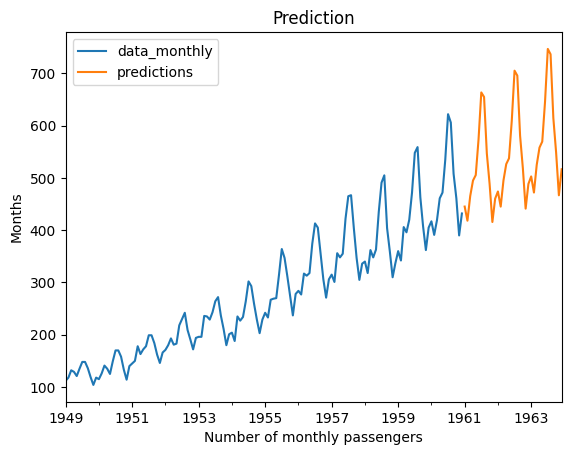

In [10]:
model = ExponentialSmoothing(data_monthly, trend='add', seasonal='mul', seasonal_periods=12).fit()
predictions = model.forecast(steps=int(len(data_monthly)/4)) #for next year
ax=data_monthly.plot()
predictions.plot(ax=ax)
ax.legend(["data_monthly", "predictions"])
ax.set_xlabel('Number of monthly passengers')
ax.set_ylabel('Months')
ax.set_title('Prediction')
